In [6]:
import gym
from gym.wrappers import AtariPreprocessing, FrameStack
import matplotlib.pyplot as plt
from agent import Agent
from PIL import Image
import torch
import random

env = gym.make("ALE/Breakout-v5", frameskip=1)
env = AtariPreprocessing(env, frame_skip=4)
env = FrameStack(env, 4)
agent = Agent(env, buffer_size=1000) # change this?
# agent.train(1) # change this?
# or: load weights of a saved model
agent.Q.load_state_dict(torch.load("model_weights_Q.pth"))
agent.Q.eval()

DQN(
  (conv1): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
  (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=3136, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=4, bias=True)
)

In [4]:
frames = []
state = agent.env.reset()
image = Image.fromarray(agent.env.render(mode="rgb_array"))

for i in range(1):
    done = False
    state = agent.env.reset()
    counter = 0
    for step in range(500):
        q_values = agent.Q(torch.Tensor(state).unsqueeze(0))
        if random.random() < 0.1:  # epsilon-random policy
                action = agent.env.action_space.sample()
        else:
                action = torch.argmax(q_values)
        next_state, reward, done, info = agent.env.step(action)
        rgb_array = agent.env.render(mode="rgb_array")
        frames.append(Image.fromarray(rgb_array))
        state = next_state
        counter += 1
        if done or (agent.env.ale.lives() == 0):
            print(f"Episode finished after {counter} steps")
            break
env.close()

image.save('clip.gif',
           save_all=True, append_images=frames,
           optimize=False, loop=0)

Episode finished after 317 timesteps



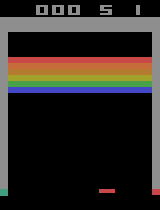

In [5]:
# pip install git+https://github.com/tensorflow/docs

import tensorflow_docs.vis.embed as embed
embed.embed_file('clip.gif')